In [ ]:
import json
import os

# Define the metrics from your tables
metrics = [
    "Win Rate", "Avg VP", "Avg Turns", "Avg Settles", "Avg Cities", 
    "Avg Roads", "Avg Army", "Avg Dev VP"
]

# Define the models and agents
models = ["GPT-4o", "Claude-3.7", "Mistral-Large"]
agents = ["BaseAgent", "StructuredAgent", "PromptEvolver", "SelfEvolver"]

# Create data structure based on your tables
results_data = {
    "BaseAgent": {
        "GPT-4o": {
            "Win Rate": 0.00,
            "Avg VP": 3.60,
            "Avg Turns": 72.20,
            "Avg Settles": 1.80,
            "Avg Cities": 0.50,
            "Avg Roads": 0.00,
            "Avg Army": 0.00,
            "Avg Dev VP": 0.80
        },
        "Claude-3.7": {
            "Win Rate": 0.00,
            "Avg VP": 3.70,
            "Avg Turns": 80.80,
            "Avg Settles": 2.10,
            "Avg Cities": 0.30,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.60
        },
        "Mistral-Large": {
            "Win Rate": 0.00,
            "Avg VP": 3.60,
            "Avg Turns": 67.80,
            "Avg Settles": 2.50,
            "Avg Cities": 0.10,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.50
        }
    },
    "StructuredAgent": {
        "GPT-4o": {
            "Win Rate": 0.00,
            "Avg VP": 3.80,
            "Avg Turns": 73.10,
            "Avg Settles": 2.00,
            "Avg Cities": 0.30,
            "Avg Roads": 0.00,
            "Avg Army": 0.20,
            "Avg Dev VP": 0.80
        },
        "Claude-3.7": {
            "Win Rate": 0.00,
            "Avg VP": 4.10, 
            "Avg Turns": 76.40,
            "Avg Settles": 1.80,
            "Avg Cities": 0.20,
            "Avg Roads": 0.00,
            "Avg Army": 0.40,
            "Avg Dev VP": 1.10
        },
        "Mistral-Large": {
            "Win Rate": 0.00,
            "Avg VP": 2.50,
            "Avg Turns": 82.10,
            "Avg Settles": 2.30,
            "Avg Cities": 0.00,
            "Avg Roads": 0.10,
            "Avg Army": 0.00,
            "Avg Dev VP": 0.00
        }
    },
    "PromptEvolver": {
        "GPT-4o": {k: None for k in metrics},
        "Claude-3.7": {k: None for k in metrics},
        "Mistral-Large": {k: None for k in metrics}
    },
    "SelfEvolver": {
        "GPT-4o": {k: None for k in metrics},
        "Claude-3.7": {k: None for k in metrics},
        "Mistral-Large": {k: None for k in metrics}
    }
}

# Save to JSON file
with open('paper_results_2.json', 'w') as f:
    json.dump(results_data, f, indent=4)

print(f"JSON file saved to {os.path.abspath('paper_results_2.json')}")

# Display the structure
results_data

JSON file saved to /Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/paper_results.json


{'BaseAgent': {'GPT-4o': {'Win Rate': 0.0,
   'Avg VP': 3.6,
   'Avg Turns': 72.2,
   'Avg Settles': 1.8,
   'Avg Cities': 0.5,
   'Avg Roads': 0.0,
   'Avg Army': 0.0,
   'Avg Dev VP': 0.8},
  'Claude-3.7': {'Win Rate': 0.0,
   'Avg VP': 3.7,
   'Avg Turns': 80.8,
   'Avg Settles': 2.1,
   'Avg Cities': 0.3,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.6},
  'Mistral-Large': {'Win Rate': 0.0,
   'Avg VP': 3.6,
   'Avg Turns': 67.8,
   'Avg Settles': 2.5,
   'Avg Cities': 0.1,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.5}},
 'StructuredAgent': {'GPT-4o': {'Win Rate': 0.0,
   'Avg VP': 3.8,
   'Avg Turns': 73.1,
   'Avg Settles': 2.0,
   'Avg Cities': 0.3,
   'Avg Roads': 0.0,
   'Avg Army': 0.2,
   'Avg Dev VP': 0.8},
  'Claude-3.7': {'Win Rate': 0.0,
   'Avg VP': 4.1,
   'Avg Turns': 76.4,
   'Avg Settles': 1.8,
   'Avg Cities': 0.2,
   'Avg Roads': 0.0,
   'Avg Army': 0.4,
   'Avg Dev VP': 1.1},
  'Mistral-Large': {'Win Rate': 0.0,
   'Avg VP': 2.5,
  

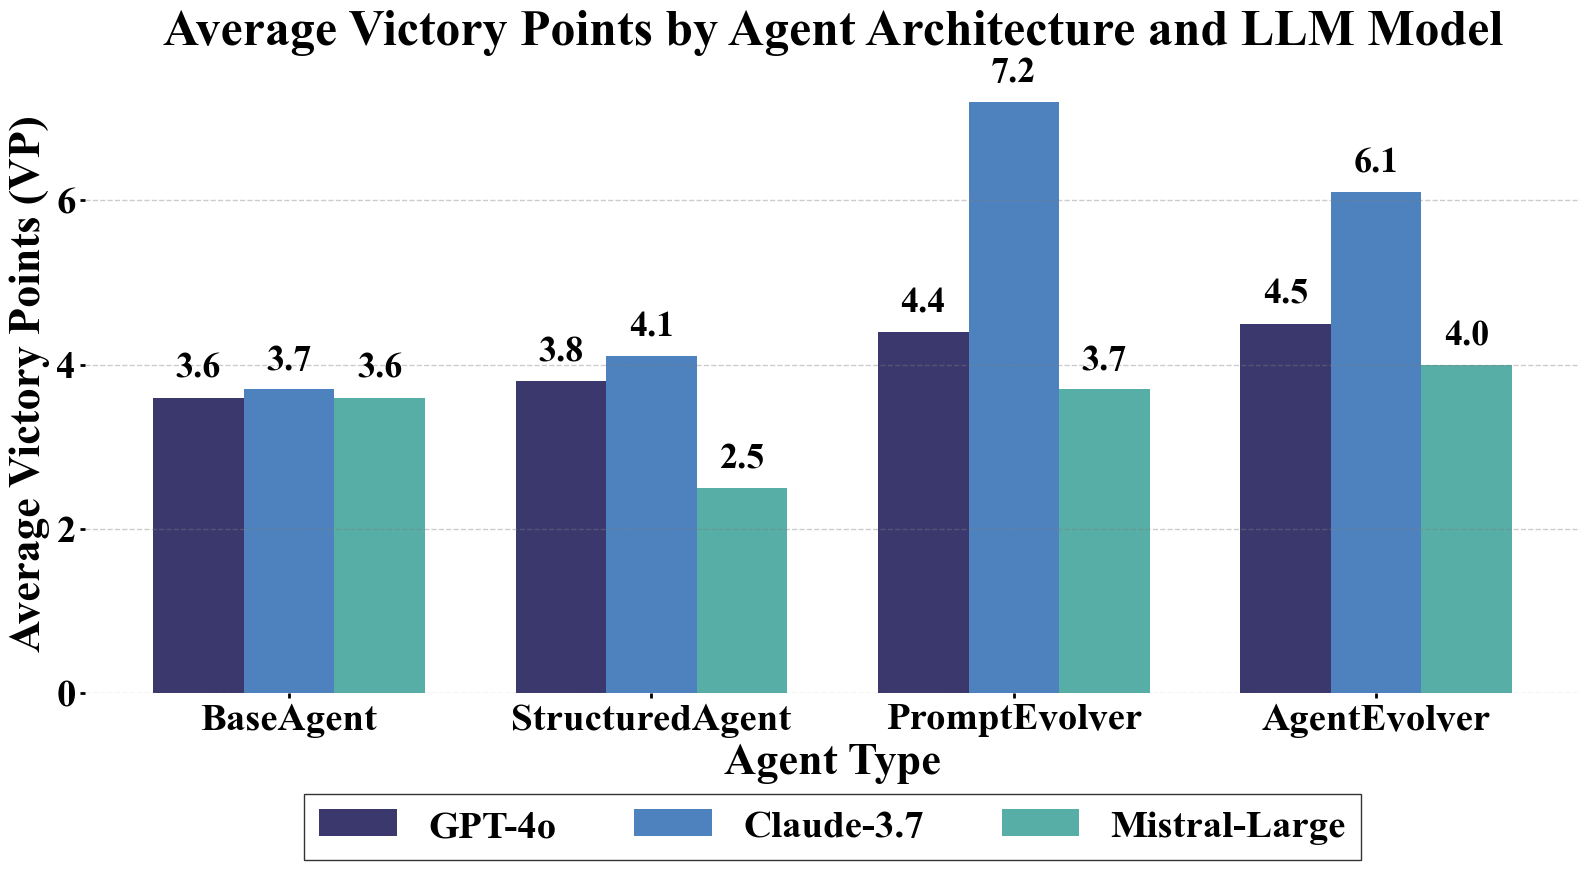

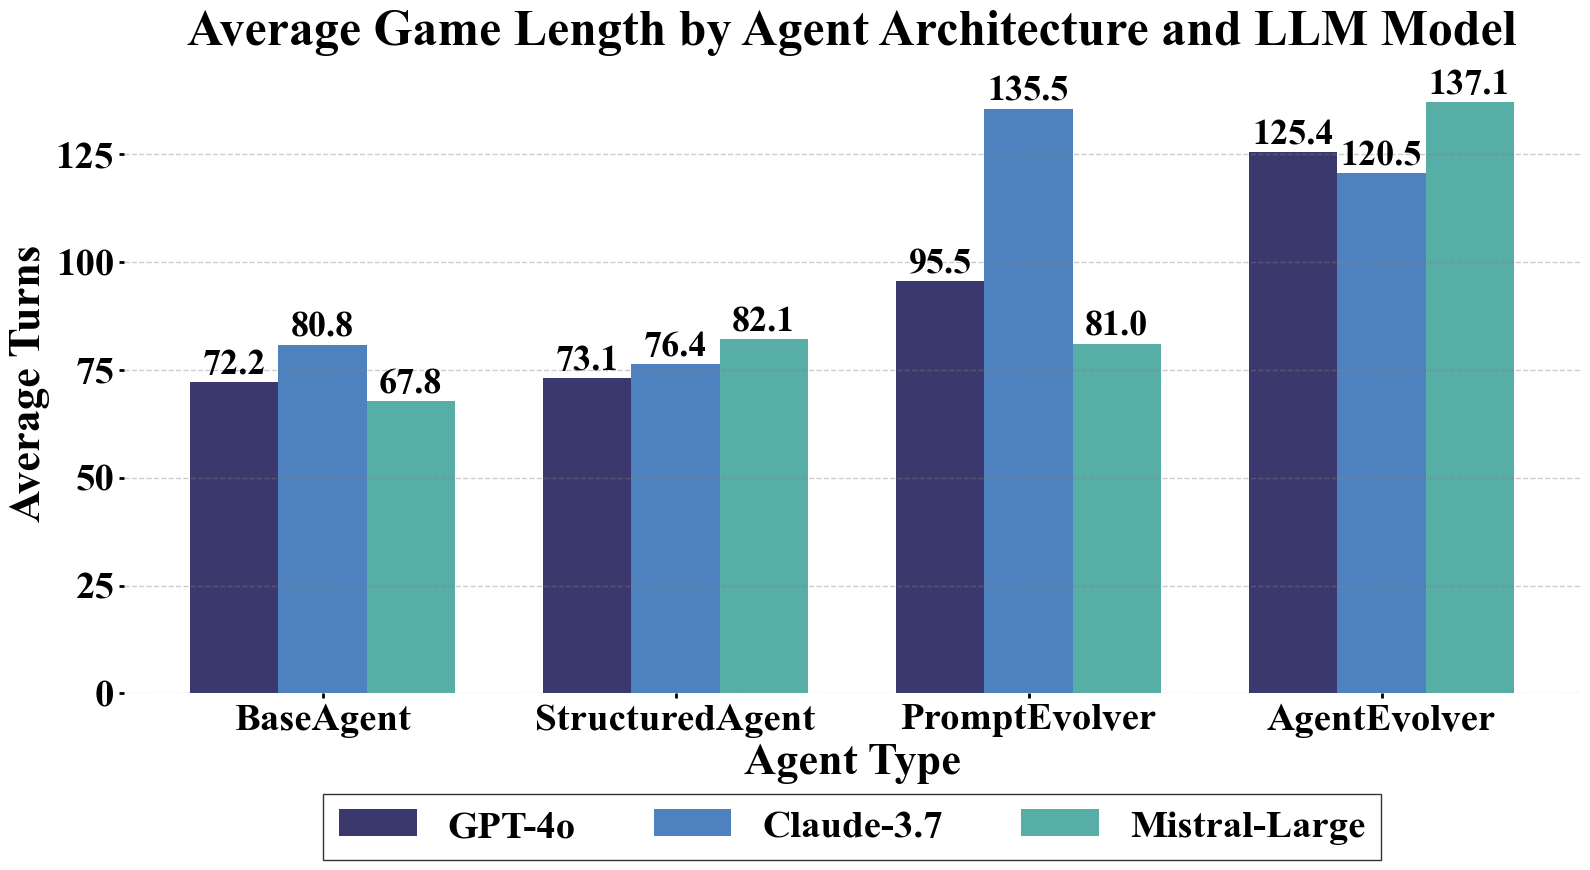

In [31]:
import matplotlib.pyplot as plt
import numpy as np


    
def plot_metric_histogram(paper_results_path, metric="Avg VP", title=None, y_label=None, threshold=None):
    """
    Creates a histogram showing performance metrics for each agent, grouped by model.
    Styled for machine learning paper publication with very large, bold fonts and academic styling.
    Bars are displayed with solid colors without borders.
    
    Args:
        paper_results_path: Path to the paper_results.json file containing performance data
        metric: The metric to plot (e.g., "Avg VP", "Avg Turns", etc.)
        title: Custom title for the plot (if None, will be generated based on metric)
        y_label: Custom y-axis label (if None, will use the metric name)
        threshold: Optional horizontal line to show a threshold value (e.g., 10 for victory)
    """
    # Load the results data from the provided JSON path
    with open(paper_results_path, 'r') as f:
        results_data = json.load(f)
    
    # Set the font to serif for academic papers with increased weight
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'Palatino', 'serif'],
        'mathtext.fontset': 'stix',
        'font.weight': 'bold',
    })
    
    # Extract agent and model names
    agents = list(results_data.keys())
    models = list(results_data[agents[0]].keys())
    
    # Set up the plot - even larger figure for better resolution and text visibility
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Width of each bar and spacing
    bar_width = 0.25
    
    # Define positions for groups of bars
    indices = np.arange(len(agents))
    
    # Define colors for models - more vibrant, high-contrast colors for better visibility
    colors = ['#26225e', '#3974b7', '#45a59d']  # Enhanced blue, orange, green
    
    # Plot bars for each model
    for i, model in enumerate(models):
        metric_values = []
        for agent in agents:
            # Skip if data is None/null
            if results_data[agent][model][metric] is None:
                metric_values.append(0)  # Use 0 for missing data
            else:
                metric_values.append(results_data[agent][model][metric])
        
        # Plot the bars for this model without borders (removed edgecolor and linewidth)
        ax.bar(indices + i*bar_width - bar_width, metric_values, bar_width, 
               label=model, color=colors[i], alpha=0.9)
    
    # Add labels, title, and legend with larger font sizes and extra bold
    ax.set_xlabel('Agent Type', fontsize=32, fontweight='bold')  # Increased from 24 to 32
    
    # Use provided y-label or default to metric name
    if y_label is None:
        y_label = metric
    ax.set_ylabel(y_label, fontsize=32, fontweight='bold')  # Increased from 24 to 32
    
    # Use provided title or generate based on metric
    if title is None:
        title = f'{metric} by Agent Type and Model'
    ax.set_title(title, fontsize=36, fontweight='bold', pad=20)  # Increased from 28 to 36
    
    # Set x-axis ticks in the middle of each group with larger font
    ax.set_xticks(indices)
    ax.set_xticklabels(agents, fontsize=28, fontweight='bold')  # Increased from 22 to 28
    
    # Increase y-axis tick label size significantly
    ax.tick_params(axis='y', labelsize=28, width=2)  # Increased from 22 to 28
    ax.tick_params(axis='x', width=2)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.4, color='gray', linewidth=1.0)
    
    # Add legend with larger font and more prominence
    legend = ax.legend(fontsize=28, frameon=True, fancybox=False, edgecolor='black',  # Increased from 22 to 28
              loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=4)
    
    # Make legend title and entries bold
    plt.setp(legend.get_title(), fontweight='bold')
    
    # Add data labels on top of each bar with larger font and more visibility
    for i, model in enumerate(models):
        for j, agent in enumerate(agents):
            value = results_data[agent][model][metric]
            if value is not None:
                # Position label above bar with more space
                y_pos = value + 0.15 if value >= 0 else value - 0.4
                ax.text(j + i*bar_width - bar_width, y_pos, f"{value}", 
                        ha='center', va='bottom', fontsize=26, fontweight='bold')  # Increased from 20 to 26
    
    # Set a tight layout but with more bottom padding for the legend
    plt.tight_layout(rect=[0, 0.08, 1, 0.98])
    
    # Remove borders from the plot for a cleaner look
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Save the figure with high DPI for publication
    safe_metric = metric.replace(" ", "_").lower()
    plt.savefig(f'{safe_metric}_comparison.pdf', bbox_inches='tight', dpi=600)
    plt.savefig(f'{safe_metric}_comparison.png', bbox_inches='tight', dpi=300)
    
    return fig


# Save to JSON file
with open('paper_results.json', 'r') as f:
    results_data = json.load(f)


# Examples of how to use the function:
# Plot average victory points with victory threshold line
vp_fig = plot_metric_histogram(
    paper_results_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/paper_results.json", 
    metric="Avg VP", 
    threshold=10,
    title="Average Victory Points by Agent Architecture and LLM Model",
    y_label="Average Victory Points (VP)"
)

turns_fig = plot_metric_histogram(
    paper_results_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/paper_results.json", 
    metric="Avg Turns", 
    title="Average Game Length by Agent Architecture and LLM Model",
    y_label="Average Turns"
)

plt.show()

Loading prompt evolution data from: /Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/claude_prompt_performance.json
Loading self evolution data from: /Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/claude_agent_performance.json
Saved figures to:
/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/claude-3.7_evolution_performance.pdf
/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/claude-3.7_evolution_performance.png
Loading prompt evolution data from: /Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/gpt_prompt_performance.json
Loading self evolution data from: /Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/gpt_agent_performance.json
Saved figures to:
/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/gpt-4o_evolution_performance.pdf
/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/gpt-4o_ev

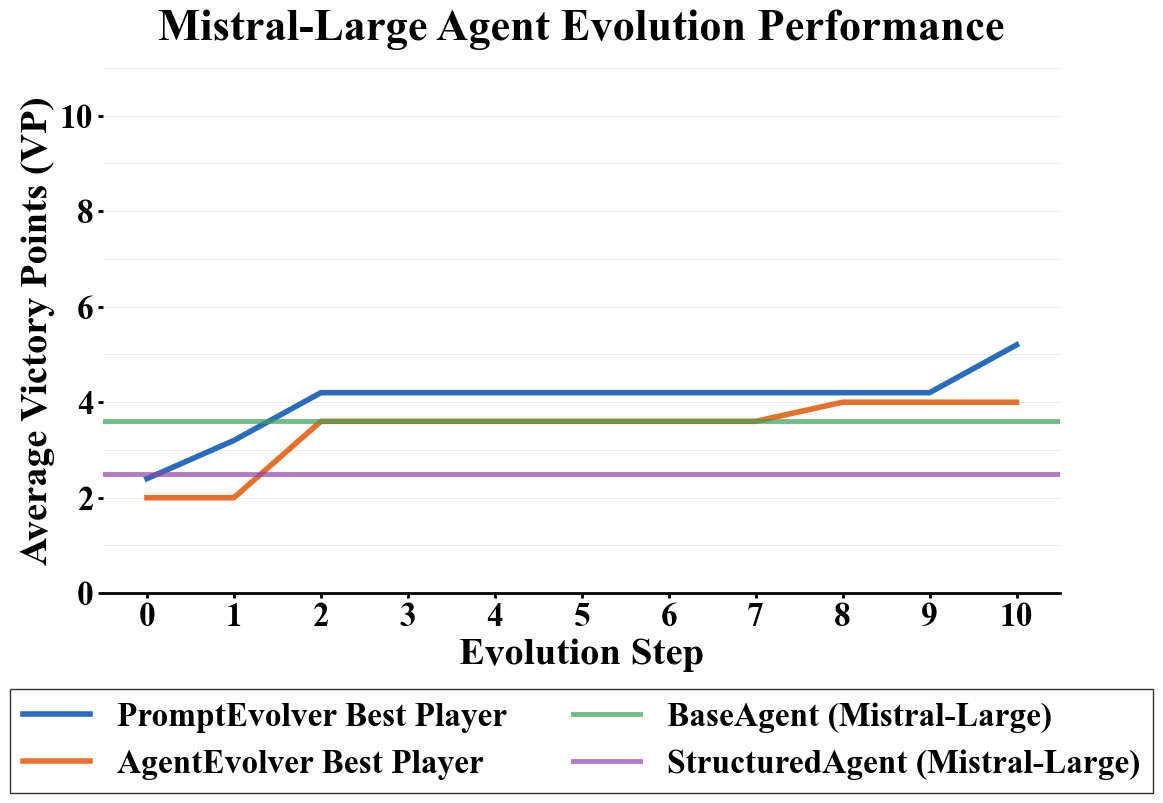

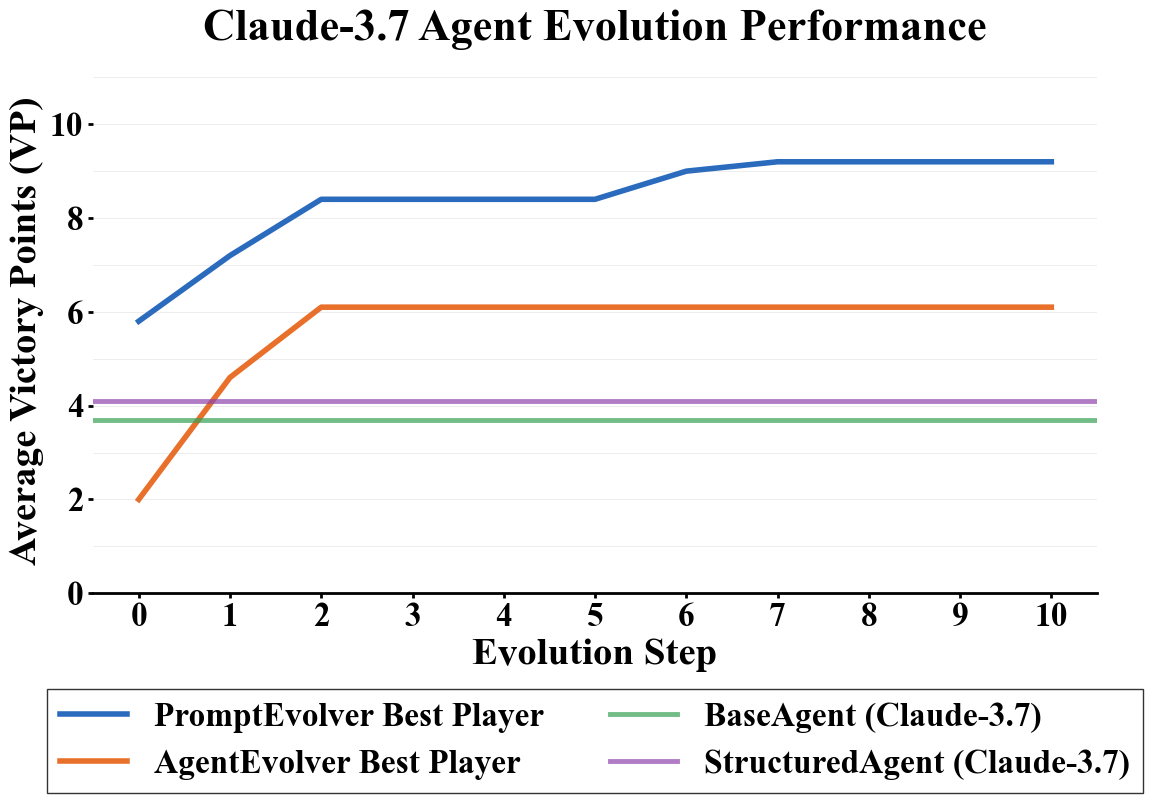

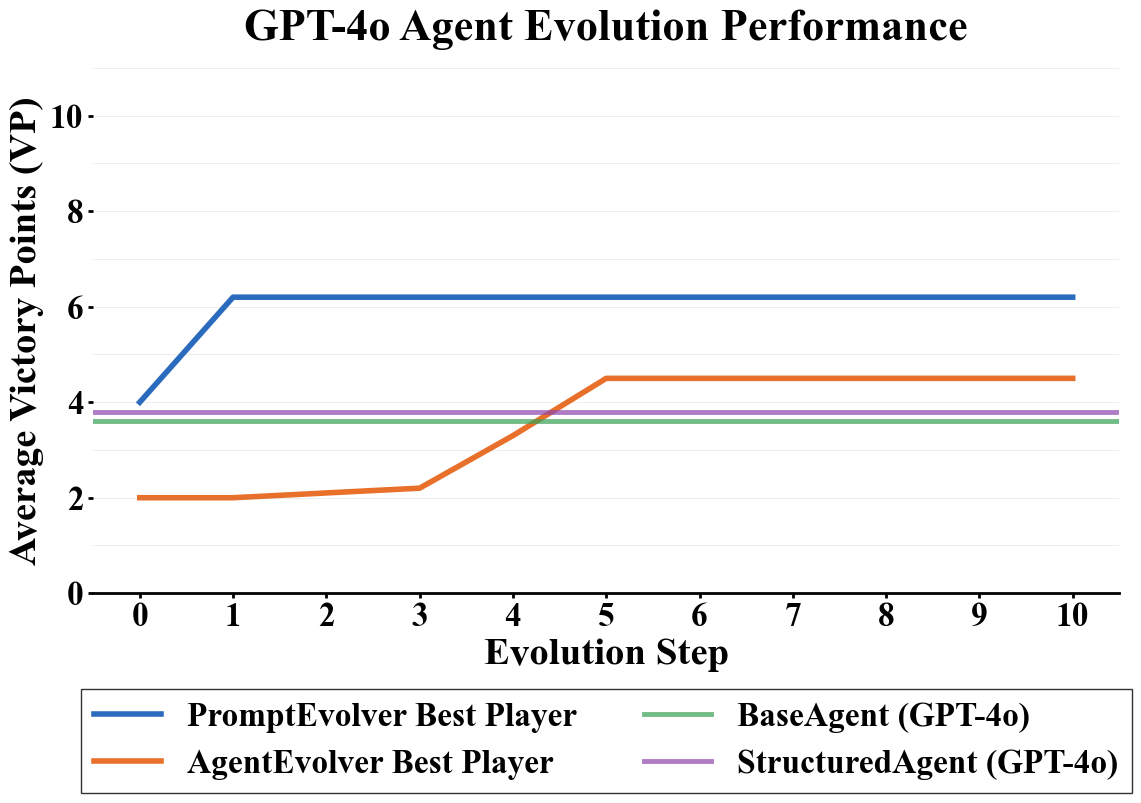

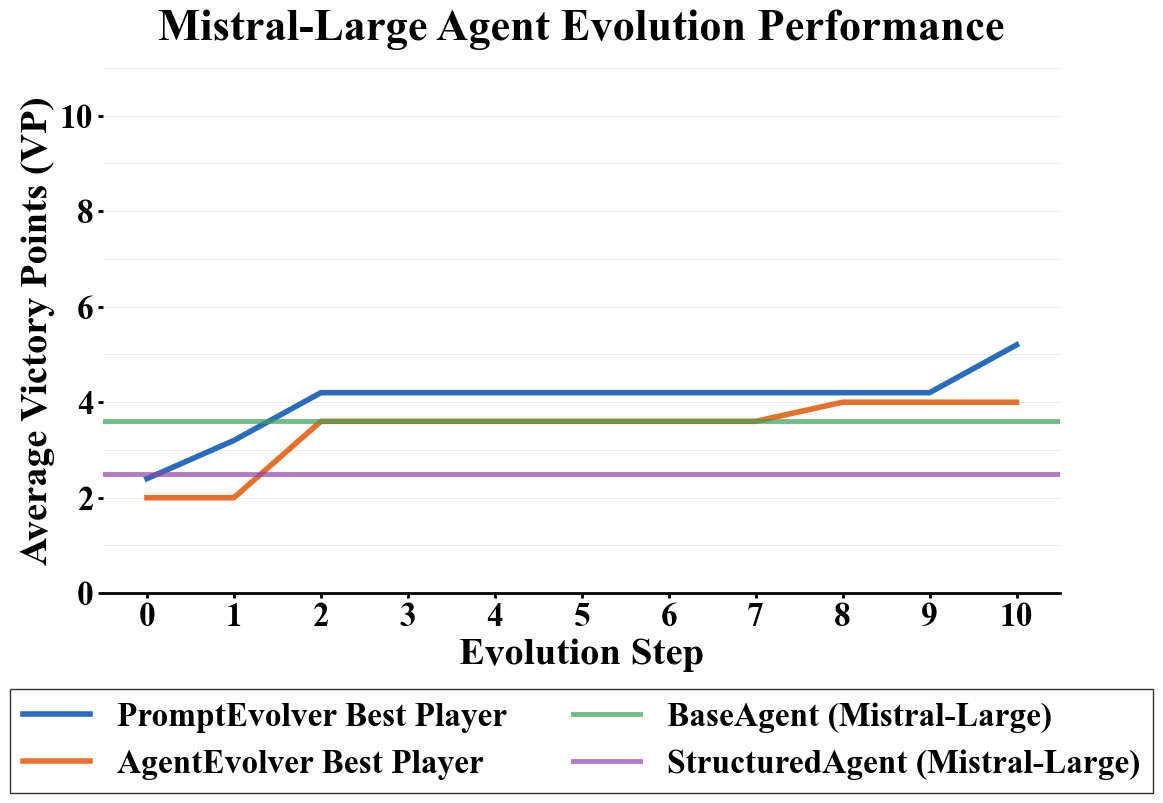

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path
import os

def plot_evolution_performance(model_name, prompt_evolving_path=None, self_evolving_path=None, paper_results_filename="paper_results.json"):
    """
    Creates a line graph showing evolution of average victory points for both
    prompt-evolving and self-evolving agents for a specific LLM model,
    compared to the baseline agents with the same model.
    
    Shows only the highest score achieved to date at each evolution step.
    Plots data for steps 0-10 regardless of data availability, using best score so far.
    All lines are solid with different colors, with a legend at the bottom.
    
    Args:
        model_name: Name of the LLM model (e.g., "GPT-4o")
        prompt_evolving_path: Path to prompt evolving agent's performance history (optional)
        self_evolving_path: Path to self evolving agent's performance history (optional)
        paper_results_filename: Name of the paper_results.json file in current directory
    """
    if not prompt_evolving_path and not self_evolving_path:
        print("Error: At least one of prompt_evolving_path or self_evolving_path must be provided")
        return None
    
    # Get the current working directory (where the notebook is running)
    current_dir = Path(os.getcwd())
    paper_results_path = current_dir / paper_results_filename
    
    # Set the font to serif for academic papers with increased weight
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif', 'Palatino', 'serif'],
        'mathtext.fontset': 'stix',
        'font.weight': 'bold',
    })
    
    # Load the paper results for baseline comparison
    with open(paper_results_path, 'r') as f:
        paper_results = json.load(f)
    
    # Create plot with academic styling - narrower width
    fig, ax = plt.subplots(figsize=(12, 10))  # Reduced width from 16 to 12
    
    # Define colors for each line type - all solid lines but different colors
    colors = {
        'PromptEvolver': '#2B6BBD',    # Blue
        'SelfEvolver': '#E8702A',      # Orange
        'BaseAgent': '#37A055',        # Green
        'StructuredAgent': '#8E44AD',  # Purple
    }
    
    # Use the same solid line style for all
    line_style = '-'
    
    # Define agent names for legend
    agent_names = {
        'PromptEvolver': 'PromptEvolver Best Player',
        'SelfEvolver': 'AgentEvolver Best Player',
        'BaseAgent': f'BaseAgent ({model_name})',
        'StructuredAgent': f'StructuredAgent ({model_name})'
    }
    
    # Get baseline scores for the specified model
    baselines = {}
    for agent_type in ["BaseAgent", "StructuredAgent"]:
        if model_name in paper_results[agent_type]:
            baselines[agent_type] = paper_results[agent_type][model_name]["Avg VP"]
    
    # Fixed number of evolution steps (0 to 10)
    max_steps = 10
    evolution_steps = list(range(max_steps + 1))  # 0 to 10 inclusive
    
    # Plot prompt evolving data if provided
    if prompt_evolving_path:
        # Handle both absolute and relative paths
        if not os.path.isabs(prompt_evolving_path):
            prompt_evolving_path = current_dir / prompt_evolving_path
        
        print(f"Loading prompt evolution data from: {prompt_evolving_path}")
        with open(prompt_evolving_path, 'r') as f:
            evolution_data = json.load(f)
        
        # Create a mapping of step number to score data
        step_to_score = {}
        for step_key, step_data in evolution_data.items():
            step = int(step_key.split()[-1])
            score = step_data["avg_score"]
            step_to_score[step] = score
        
        # Generate best-so-far scores for all steps 0-10
        best_scores = []
        best_score_so_far = float('-inf')
        
        for step in evolution_steps:
            # If we have data for this step, use it; otherwise continue with best so far
            if step in step_to_score:
                current_score = step_to_score[step]
                if current_score > best_score_so_far:
                    best_score_so_far = current_score
            best_scores.append(best_score_so_far)
        
        # If there's no data at all, replace -inf with 0
        if best_score_so_far == float('-inf'):
            best_scores = [0] * len(evolution_steps)
        
        # Plot line with label for legend
        ax.plot(evolution_steps, best_scores, 
                label=agent_names['PromptEvolver'], 
                color=colors['PromptEvolver'],
                linestyle=line_style,
                linewidth=4)  # Increased linewidth
    
    # Plot self evolving data if provided
    if self_evolving_path:
        # Handle both absolute and relative paths
        if not os.path.isabs(self_evolving_path):
            self_evolving_path = current_dir / self_evolving_path
        
        print(f"Loading self evolution data from: {self_evolving_path}")
        with open(self_evolving_path, 'r') as f:
            evolution_data = json.load(f)
        
        # Create a mapping of step number to score data
        step_to_score = {}
        for step_key, step_data in evolution_data.items():
            step = int(step_key.split()[-1])
            score = step_data["avg_score"]
            step_to_score[step] = score
        
        # Generate best-so-far scores for all steps 0-10
        best_scores = []
        best_score_so_far = float('-inf')
        
        for step in evolution_steps:
            # If we have data for this step, use it; otherwise continue with best so far
            if step in step_to_score:
                current_score = step_to_score[step]
                if current_score > best_score_so_far:
                    best_score_so_far = current_score
            best_scores.append(best_score_so_far)
        
        # If there's no data at all, replace -inf with 0
        if best_score_so_far == float('-inf'):
            best_scores = [0] * len(evolution_steps)
        
        # Plot line with label for legend
        ax.plot(evolution_steps, best_scores, 
                label=agent_names['SelfEvolver'], 
                color=colors['SelfEvolver'],
                linestyle=line_style,
                linewidth=4)  # Increased linewidth
    
    # Add horizontal lines for baseline model performance
    for agent_type, score in baselines.items():
        ax.axhline(y=score, 
                  color=colors[agent_type],
                  linestyle=line_style,
                  linewidth=3.5,  # Increased linewidth
                  alpha=0.7,
                  label=agent_names[agent_type])
    
    # Format the plot with larger, bolder text
    ax.set_xlabel('Evolution Step', fontsize=28, fontweight='bold')  # Further increased size
    ax.set_ylabel('Average Victory Points (VP)', fontsize=28, fontweight='bold')  # Further increased size
    ax.set_title(f'{model_name} Agent Evolution Performance', fontsize=32, fontweight='bold', pad=20)  # Further increased size
    
    # Set x-axis ticks from 0 to 10
    ax.set_xticks(range(max_steps + 1))
    ax.tick_params(axis='both', labelsize=24, width=2)  # Further increased tick label size
    
    # Collect all y values for setting the y-axis limit
    y_values = []
    
    # Add baseline values
    y_values.extend(baselines.values())
    
    # Add prompt evolving values if available
    if prompt_evolving_path:
        if not os.path.isabs(prompt_evolving_path):
            prompt_evolving_path = current_dir / prompt_evolving_path
        with open(prompt_evolving_path, 'r') as f:
            data = json.load(f)
            y_values.extend([entry["avg_score"] for entry in data.values()])
    
    # Add self evolving values if available
    if self_evolving_path:
        if not os.path.isabs(self_evolving_path):
            self_evolving_path = current_dir / self_evolving_path
        with open(self_evolving_path, 'r') as f:
            data = json.load(f)
            y_values.extend([entry["avg_score"] for entry in data.values()])
    
    # Set y-axis limit with extra space for text labels
    max_y = max(11, max(y_values) + 2)
    ax.set_ylim(bottom=0, top=max_y)
    
    # Add faint horizontal lines for each whole number
    for y_val in range(1, int(max_y) + 1):
        ax.axhline(y=y_val, color='gray', linestyle='-', alpha=0.2, linewidth=0.5)
    
    # Remove all grid lines (we're using custom horizontal lines instead)
    ax.grid(False)
    
    # Remove all spines except for the bottom one
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Make the bottom spine thicker
    ax.spines['bottom'].set_linewidth(2)  # Increased thickness
    ax.spines['bottom'].set_color('black')
    
    # Add legend with larger font and more prominence at the bottom
    legend = ax.legend(fontsize=24, frameon=True, fancybox=False, edgecolor='black',  # Increased size
                     loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Make legend title and entries bold
    plt.setp(legend.get_title(), fontweight='bold')
    
    # Add a tight layout with padding for legend
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjusted for bottom legend
    
    # Save figures to current directory with model name in filename
    output_pdf = current_dir / f'{model_name.lower()}_evolution_performance.pdf'
    output_png = current_dir / f'{model_name.lower()}_evolution_performance.png'
    plt.savefig(output_pdf, bbox_inches='tight', dpi=600)
    plt.savefig(output_png, bbox_inches='tight', dpi=300)
    print(f"Saved figures to:\n{output_pdf}\n{output_png}")
    
    return fig

# Example usage:
plot_evolution_performance(
    model_name="Claude-3.7",
    prompt_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/claude_prompt_performance.json",
    self_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/claude_agent_performance.json"
)

plot_evolution_performance(
    model_name="GPT-4o",
    prompt_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/gpt_prompt_performance.json",
    self_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/gpt_agent_performance.json"
)

plot_evolution_performance(
    model_name="Mistral-Large",
    prompt_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/mistral_prompt_performace.json",
    self_evolving_path="/Users/nikbelle/Develop/NLP-Group/strategy-game-agents/plotting/performance-history/mistral_agent_performance.json"
)